In [1]:
from lib.prox import ProxPruner


ModuleNotFoundError: No module named 'lib'

In [4]:

import torch
X=torch.rand(3,3)

torch.linalg.eigh(X.T.matmul(X))

torch.return_types.linalg_eigh(
eigenvalues=tensor([1.6678e-04, 4.0517e-01, 2.9859e+00]),
eigenvectors=tensor([[-0.4941,  0.3106, -0.8120],
        [ 0.0754, -0.9152, -0.3959],
        [ 0.8661,  0.2569, -0.4287]]))

In [7]:
eigenvalues, eigenvectors = torch.linalg.eigh(X.T.matmul(X))
max_eigenvalue = eigenvalues[-1]

print(eigenvalues)
print(max_eigenvalue)

tensor([1.6678e-04, 4.0517e-01, 2.9859e+00])
tensor(2.9859)


In [8]:
!python main.py \
    --model baffo32/decapoda-research-llama-7B-hf \
    --prune_method magnitude \
    --sparsity_ratio 0.6 \
    --sparsity_type unstructured \
    --save out/llama_7b/unstructured/MP/  \

python: can't open file '/home/zyh/lib/main.py': [Errno 2] No such file or directory


In [9]:
import torch
import numpy as np
from scipy.sparse.linalg import eigs
import time

# 创建一个 PyTorch 张量
A_torch = torch.randn(1000, 1000)
A_torch=A_torch+A_torch.T
A_np = A_torch.numpy()

# 计算最大特征值 (使用 SciPy)
start_time_scipy = time.time()
values, _ = eigs(A_np, k=1, which='LM')
max_eigenvalue_scipy = np.max(values)
end_time_scipy = time.time()

# 计算时间
time_scipy = end_time_scipy - start_time_scipy

# 计算最大特征值 (使用 PyTorch)
start_time_torch = time.time()
eigenvalues_torch = torch.linalg.eigvals(A_torch)

max_eigenvalue_torch = torch.max(torch.abs(eigenvalues_torch)).item()
end_time_torch = time.time()

# 计算时间
time_torch = end_time_torch - start_time_torch

print("SciPy 计算的最大特征值是:", max_eigenvalue_scipy)
print("PyTorch 计算的最大特征值是:", max_eigenvalue_torch)
print("SciPy 耗时:", time_scipy, "秒")
print("PyTorch 耗时:", time_torch, "秒")


SciPy 计算的最大特征值是: (89.63238+0j)
PyTorch 计算的最大特征值是: 89.63311004638672
SciPy 耗时: 0.03585553169250488 秒
PyTorch 耗时: 0.5628566741943359 秒


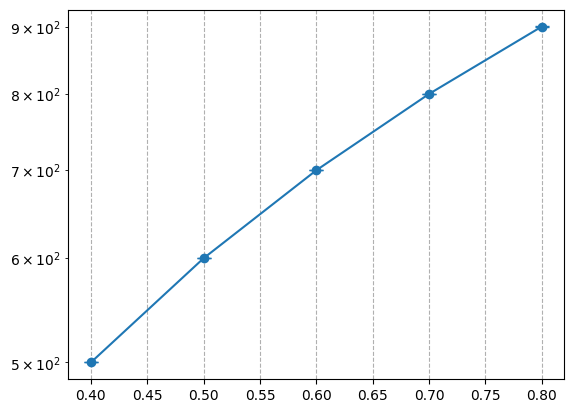

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 生成模拟数据
np.random.seed(42)  # 设置随机种子，保证结果可复现
num_data_points_per_sparsity = 5
sparsity_range = np.linspace(0.4, 0.8, num_data_points_per_sparsity)
noise_level = 0.1  # 噪声水平

data = []
for sparsity in sparsity_range:
    # 困惑度随稀疏度线性增长，并加入随机噪声
    perplexity = 1000 * sparsity + 100 + np.random.randn(num_data_points_per_sparsity) * noise_level
    for p in perplexity:
        data.append([sparsity, p])

df = pd.DataFrame(data, columns=['Sparsity', 'Perplexity'])

# 计算每个稀疏度下的平均值和标准差
grouped_data = df.groupby('Sparsity')
mean_perplexity = grouped_data['Perplexity'].mean()
std_perplexity = grouped_data['Perplexity'].std()

# 绘制误差条图
plt.errorbar(
    x=mean_perplexity.index,
    y=mean_perplexity.values,
    yerr=std_perplexity.values,
    fmt='o-',
    capsize=5
)

# 设置图表标题、坐标轴标签和刻度
# plt.title('模型困惑度随稀疏度的变化')
# plt.xlabel('稀疏度')
# plt.ylabel('困惑度')
plt.yscale('log')  # 设置y轴为对数刻度

# 添加网格线
plt.grid(linestyle='--')

# 显示图表
plt.show()